## Análisis de tecnologías (ADSL, fibra óptica, etc.) usadas por provincia a través del tiempo

In [5]:
import pandas as pd

In [8]:
df = pd.read_csv(r'Datasets/Totales Accesos Por Tecnología.csv', decimal='.')

In [10]:
df.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [11]:
df.shape

(1009, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [13]:
#Cuento los valores nulos por columna
conteo_nulos = df.isnull().sum()
print(conteo_nulos)

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


In [14]:
#Veo las filas en las que se encuentran los valores nulos:
valores_nulos = df.loc[df.isnull().any(axis=1)] 
valores_nulos

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Elimino ambas filas ya que no tienen valores.
df = df.drop([1007, 1008])

In [16]:
#Chequeo valores nulos nuevamente.
conteo_nulos = df.isnull().sum()
print(conteo_nulos)

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


In [17]:
#Busco duplicados
duplicados = df[df.duplicated()]
duplicados

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total


In [18]:
df.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,1.007000e+03,1.007000e+03,1.007000e+03,1007.000000,1007.000000,1.007000e+03
mean,1.129309e+05,1.821583e+05,4.855699e+04,12542.229394,6497.041708,3.626854e+05
std,2.362922e+05,4.460058e+05,1.758694e+05,20909.412762,11239.855091,7.773137e+05
min,2.230000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04
25%,1.978950e+04,1.102050e+04,3.540000e+02,813.000000,334.500000,6.241150e+04
50%,4.396700e+04,4.075000e+04,3.015000e+03,5224.000000,1920.000000,1.139150e+05
75%,8.722000e+04,7.678350e+04,2.925700e+04,14367.500000,7548.000000,1.956520e+05
max,1.586343e+06,2.797700e+06,1.849476e+06,138638.000000,73415.000000,5.011620e+06


Grafico un boxplot para ver la concentración de los datos según el tipo de tecnología.

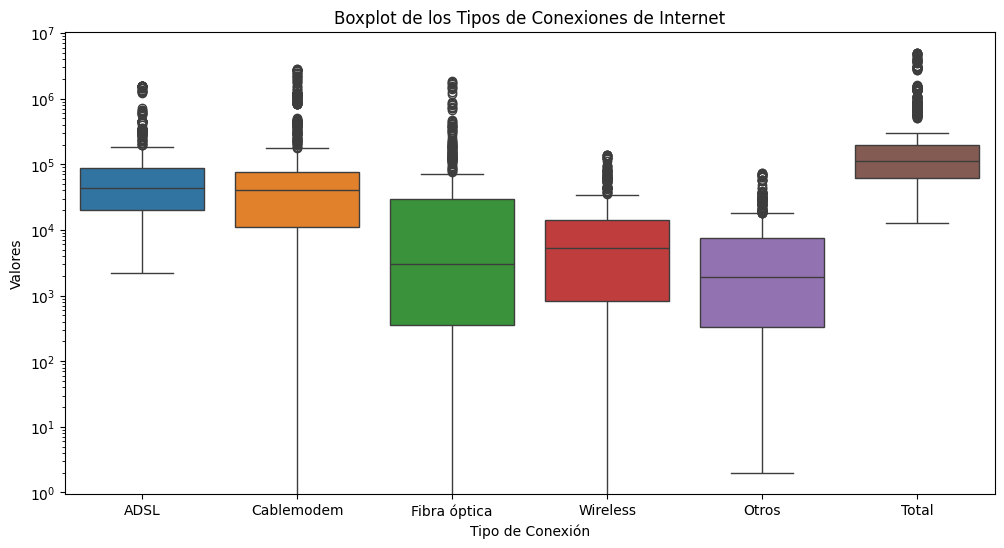

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generar el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot de los Tipos de Conexiones de Internet")
plt.xlabel("Tipo de Conexión")
plt.ylabel("Valores")
plt.yscale("log")  # Usar escala logarítmica si es necesario
plt.show()


*Cablemodem y ADSL concentran la mayoría de las conexiones a lo largo de los años.*

*Wireless y fibra óptica todavía no son tan populares.*

In [5]:
#Agrupo por provincias y años para tener los totales por año de accesos por cada tecnología.
df_total_año_por_tec = df.groupby(['Provincia', 'Año'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].sum().reset_index()

df_total_año_por_tec

,Provincia,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,Buenos Aires,2014,6275077.0,4207132.0,485970.0,71325.0,130890.0,11170394.0
1,Buenos Aires,2015,6336715.0,4645385.0,466696.0,78408.0,106578.0,11633782.0
2,Buenos Aires,2016,6300766.0,5277254.0,456511.0,82532.0,100036.0,12217099.0
3,Buenos Aires,2017,5466924.0,6290047.0,494072.0,137895.0,118925.0,12507863.0
4,Buenos Aires,2018,5643696.0,7480662.0,730038.0,263430.0,105202.0,14223028.0
...,...,...,...,...,...,...,...,...
283,Tucumán,2020,592195.0,43229.0,227799.0,6354.0,2611.0,872188.0
284,Tucumán,2021,459947.0,173434.0,291391.0,8590.0,2712.0,936074.0
285,Tucumán,2022,325604.0,116909.0,566059.0,16058.0,2020.0,1026650.0
286,Tucumán,2023,193507.0,80306.0,764891.0,16798.0,2092.0,1057594.0


Cuando quise graficar accesos por tecnología a través de los años me apareció un 2019 y un 2019*. Al chequear los datos encuentro la siguiente leyenda: 'Los datos provinciales no coinciden a nivel nacional, ya que se reincorporó información que no contiene apertura a nivel geográfico'. Por lo tanto elimino las filas 2019*.

In [6]:
df_total_año_por_tec = df_total_año_por_tec[df_total_año_por_tec['Año'] != '2019 *']

Grafico la cantidad de accesos a través de la década por tecnología y por provincia. Evito graficar la columna totales ya que lo que me interesa es ver bien cada tecnología. Voy a graficar algunas provincias por separado para una mejor visualización de las lineas en comparación con los accesos para evitar que queden encimadas.

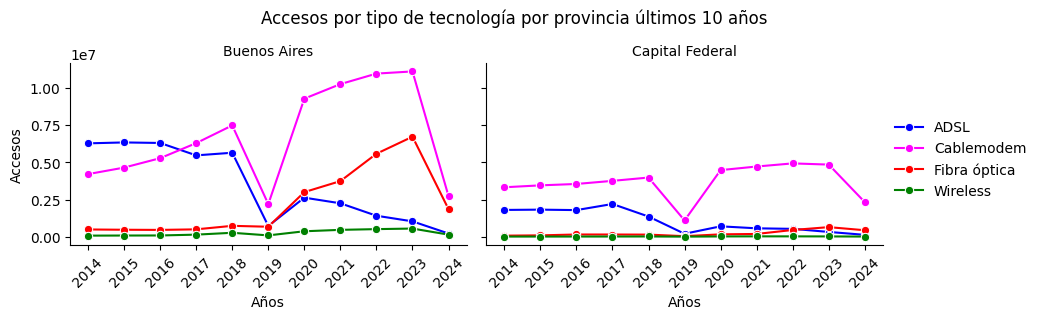

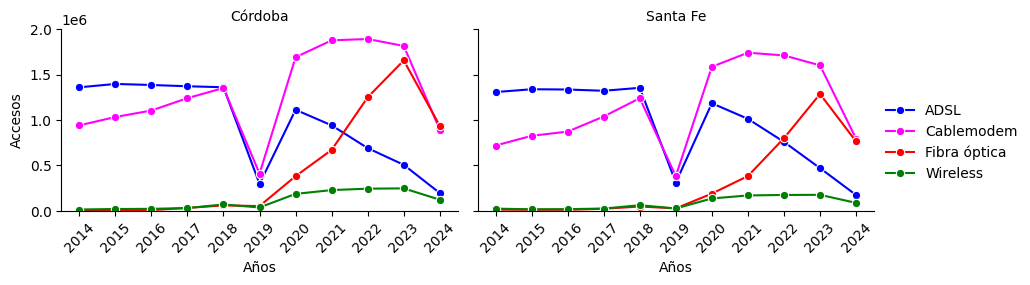

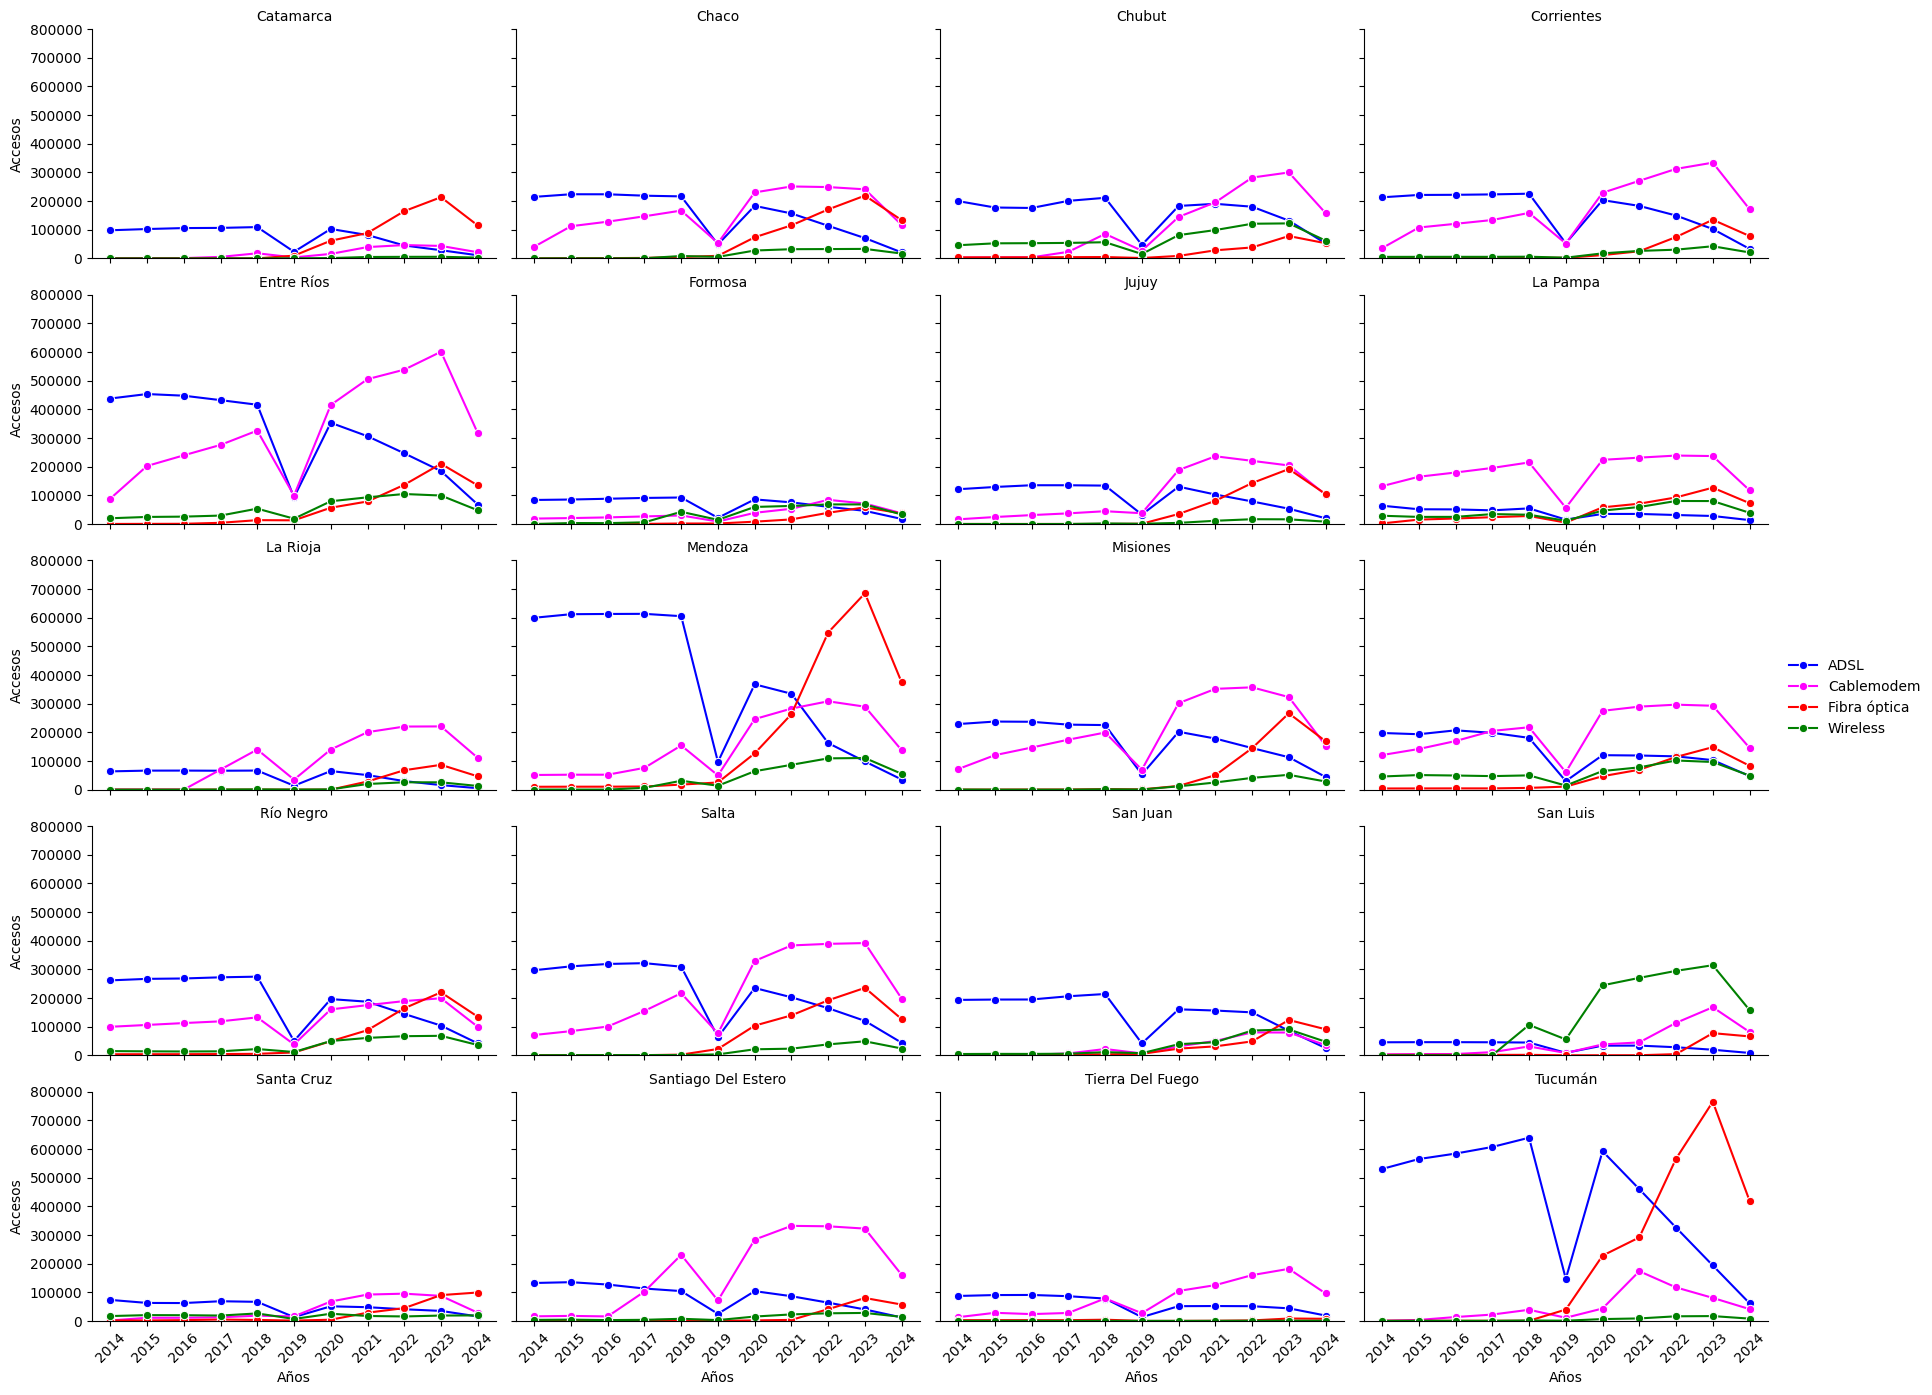

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

#Listo dos grupos de provincias
provincias_grupo1 = ['Buenos Aires', 'Capital Federal']
provincias_grupo2 = ['Córdoba', 'Santa Fe']

#Filtro el DataFrame para cada grupo de provincias
df_grupo1 = df_total_año_por_tec[df_total_año_por_tec['Provincia'].isin(provincias_grupo1)]
df_grupo2 = df_total_año_por_tec[df_total_año_por_tec['Provincia'].isin(provincias_grupo2)]

# Obtener todas las provincias del DataFrame
total_provincias = df_total_año_por_tec['Provincia'].unique()

#Saco por defecto las provincias del grupo 3
provincias_grupo3 = list(set(total_provincias) - set(provincias_grupo1) - set(provincias_grupo2))

#Filtro el DataFrame para el tercer grupo de provincias
df_grupo3 = df_total_año_por_tec[df_total_año_por_tec['Provincia'].isin(provincias_grupo3)]

#Grafico el primer grupo de provincias
g1 = sns.FacetGrid(df_grupo1, col='Provincia', col_wrap=2, height=3, aspect=1.5)
g1.map(sns.lineplot, 'Año', 'ADSL', marker='o', color='blue', label='ADSL')
g1.map(sns.lineplot, 'Año', 'Cablemodem', marker='o', color='fuchsia', label='Cablemodem')
g1.map(sns.lineplot, 'Año', 'Fibra óptica', marker='o', color='red', label='Fibra óptica')
g1.map(sns.lineplot, 'Año', 'Wireless', marker='o', color='green', label='Wireless')
g1.set_titles("{col_name}")
g1.set_axis_labels('Años', 'Accesos')
g1.add_legend()
for ax in g1.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)
plt.subplots_adjust(top=0.8)
g1.fig.suptitle('Accesos por tipo de tecnología por provincia últimos 10 años')

#Grafico el segundo grupo de provincias
g2 = sns.FacetGrid(df_grupo2, col='Provincia', col_wrap=2, height=3, aspect=1.5)
g2.map(sns.lineplot, 'Año', 'ADSL', marker='o', color='blue', label='ADSL')
g2.map(sns.lineplot, 'Año', 'Cablemodem', marker='o', color='fuchsia', label='Cablemodem')
g2.map(sns.lineplot, 'Año', 'Fibra óptica', marker='o', color='red', label='Fibra óptica')
g2.map(sns.lineplot, 'Año', 'Wireless', marker='o', color='green', label='Wireless')
g2.set_titles("{col_name}")
g2.set_axis_labels('Años', 'Accesos')
g2.add_legend()
for ax in g2.axes.flat: 
    ax.set_ylim(0, 2000000)
    ax.tick_params(axis='x', labelrotation=45)
plt.subplots_adjust(top=0.8)


#Grafico el tercer grupo de provincias
g3 = sns.FacetGrid(df_grupo3, col='Provincia', col_wrap=4, height=3, aspect=1.5)
g3.map(sns.lineplot, 'Año', 'ADSL', marker='o', color='blue', label='ADSL')
g3.map(sns.lineplot, 'Año', 'Cablemodem', marker='o', color='fuchsia', label='Cablemodem')
g3.map(sns.lineplot, 'Año', 'Fibra óptica', marker='o', color='red', label='Fibra óptica')
g3.map(sns.lineplot, 'Año', 'Wireless', marker='o', color='green', label='Wireless')
g3.set_titles("{col_name}")
g3.set_axis_labels('Años', 'Accesos')
g3.add_legend()
for ax in g3.axes.flat: 
    ax.set_ylim(0, 800000)
    ax.tick_params(axis='x', labelrotation=45)
plt.subplots_adjust(top=0.9)

plt.show()

*Salvo algunas provincias que tuvieron un marcado paso a la Fibra óptica en reemplazo del ADSL y el Cablemodem, el resto fue reemplazando el ADSL por el Cablemodem.*

*La conectividad wireless es la de niveles mas bajos*

*Se observa la mayor cantidad de accesos en las provincias mas pobladas.*

*El pico hacia abajo del 2019 en la gran mayoría de las provincias seguramente se debe a la irregularidad con los datos de ese año.*

*Los datos de 2024 son sólo de medio año. Por eso la tendecia a la baja.*